# Conversion Rate

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## 데이터 불러오기

In [3]:
df = pd.read_csv('../dataset/bank-additional-full.csv', sep=';')

In [4]:
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [8]:
# y target 변수 1=yes, 0=no
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
df['conversion'].value_counts()

conversion
0    36548
1     4640
Name: count, dtype: int64

### 1. Aggregate Conversion Rate

In [10]:
# 1인 conversion의 갯수
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [11]:
# 1인 conversion의 rate 비율
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


### 2. Conversion Rates by Number of Contacts

In [12]:
df.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64

In [13]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].sum())

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [14]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].count())

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [15]:
# contacts의 conversions rate 구하기
conversions_by_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100.0
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


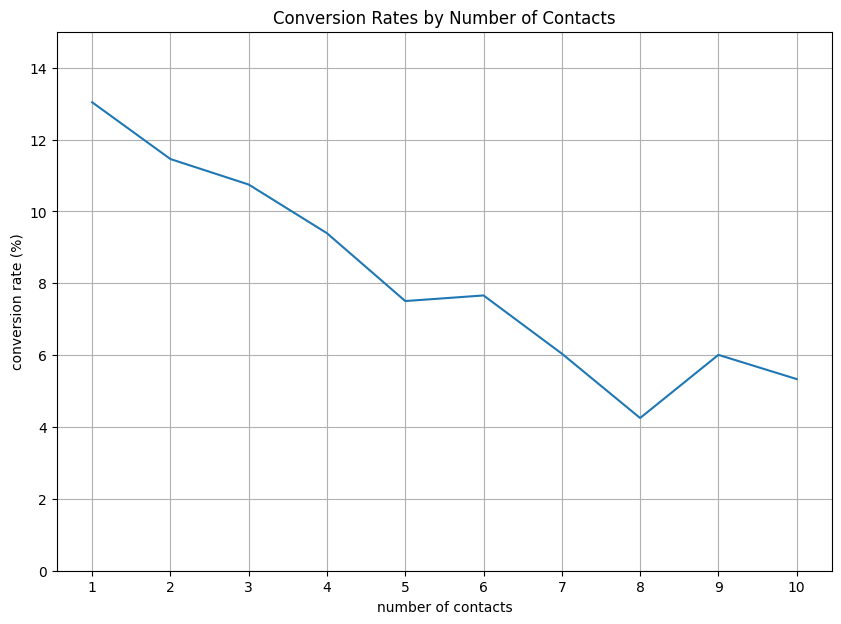

In [16]:
# plot 그리기
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 3. Conversion Rates by Age

#### - Line Chart

In [17]:
# 나이로 conversion
pd.DataFrame(df.groupby(by='age')['conversion'].sum())

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [18]:
pd.DataFrame(df.groupby(by='age')['conversion'].count())

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [19]:
conversions_by_age = df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


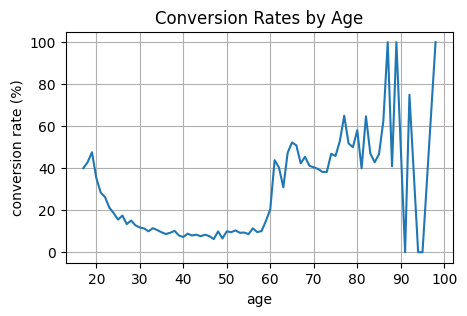

In [20]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(5, 3),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### - Age Groups

In [21]:
df['age_group'] = df['age'].apply(lambda x: '(18, 30)' if x < 30 else '(30, 40)' if x < 40 \
        else '(40, 50)' if x < 50 else '(50, 60)' if x < 60 \
        else '(60, 70)' if x < 70 else '70+'
)

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(50, 60)"


In [23]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].sum())

,conversion
age_group,
"(18, 30)",922
"(30, 40)",1715
"(40, 50)",834
"(50, 60)",697
"(60, 70)",251
70+,221


In [24]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].count())

,conversion
age_group,
"(18, 30)",5669
"(30, 40)",16938
"(40, 50)",10526
"(50, 60)",6862
"(60, 70)",724
70+,469


In [25]:
conversions_by_age_group = df.groupby(by='age_group')['conversion'].sum() / df.groupby(by='age_group')['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
"(18, 30)",16.263891
"(30, 40)",10.125162
"(40, 50)",7.923238
"(50, 60)",10.157389
"(60, 70)",34.668508
70+,47.121535


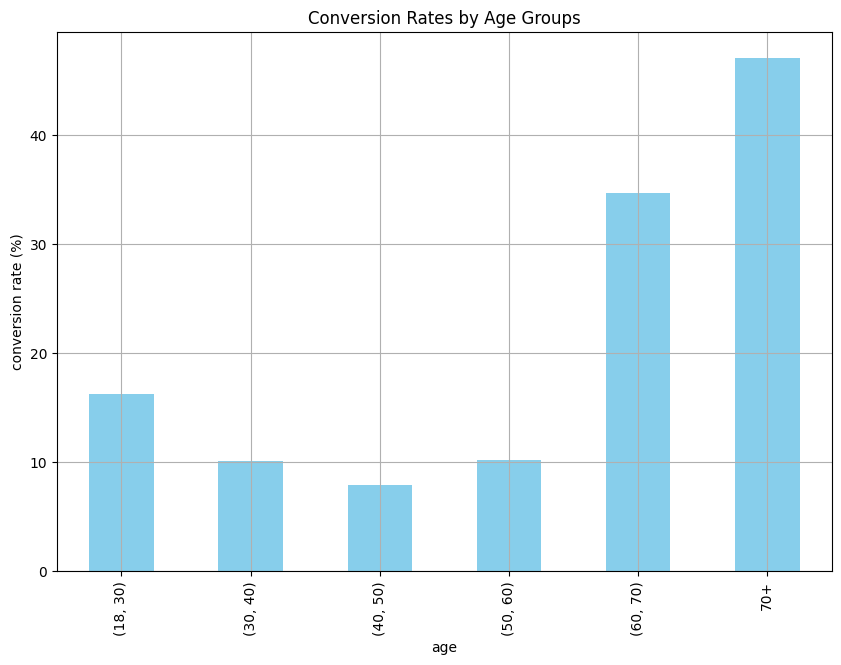

In [26]:
ax = conversions_by_age_group.loc[
    ['(18, 30)', '(30, 40)', '(40, 50)', '(50, 60)', '(60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### 4. Conversions vs. Non-Conversions

#### 4.1. Marital Status

In [27]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [28]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


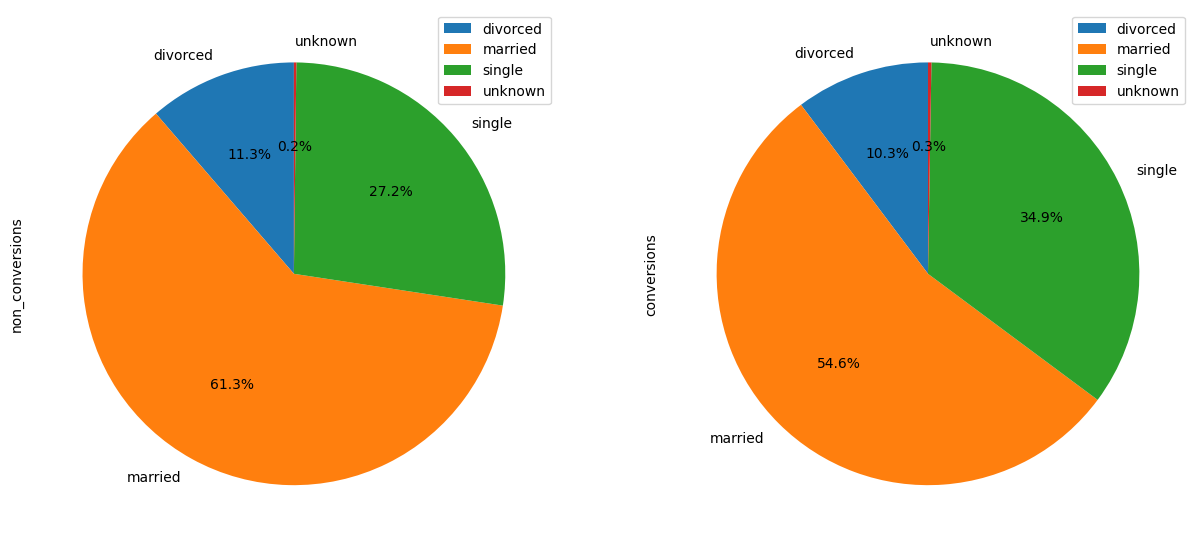

In [29]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### 4.2. Education

In [30]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [31]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


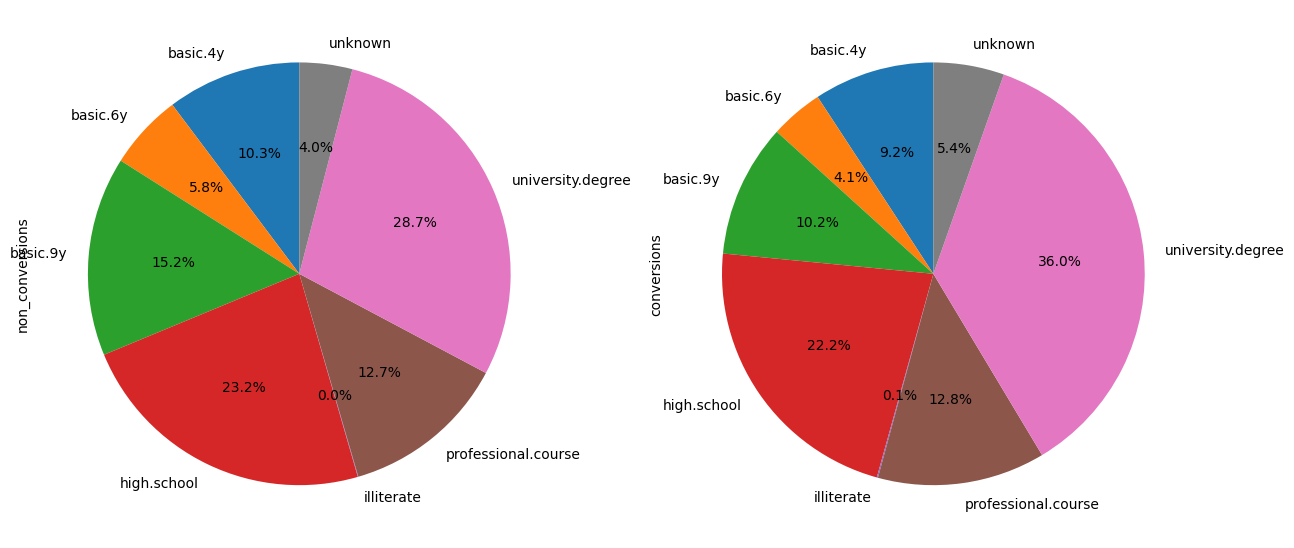

In [32]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

#### 4.3. Last Contact Duration

In [33]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [34]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60*60)

In [35]:
duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


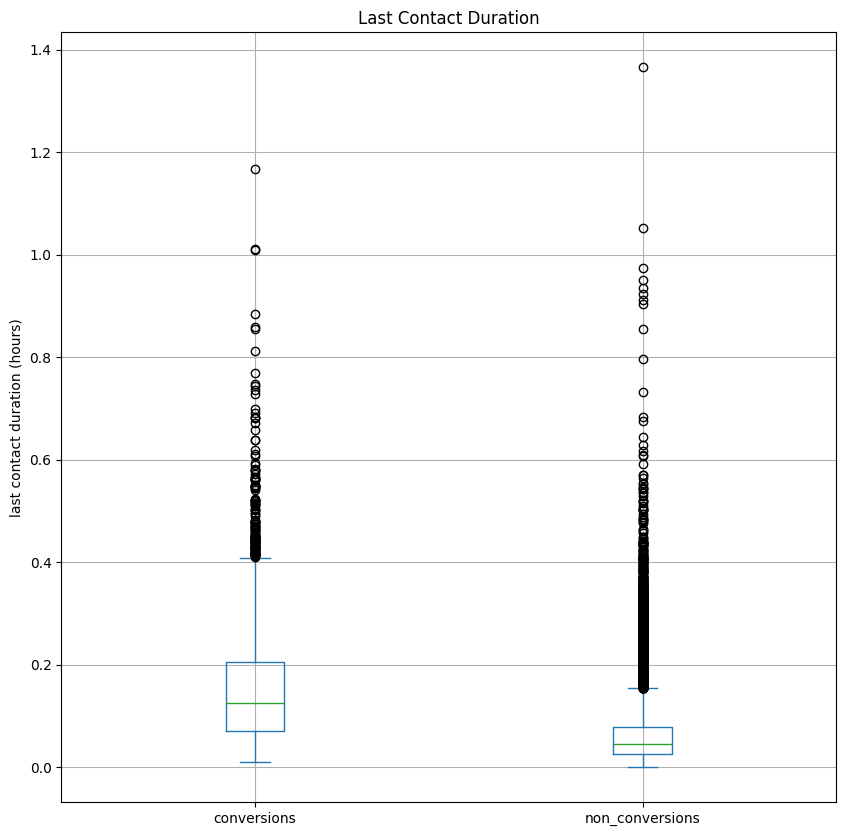

In [36]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

### 5. Conversions by Age Groups & Marital Status

In [37]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df 

marital,divorced,married,single,unknown
age_group,,,,
"(18, 30)",12.0,158.0,751.0,1.0
"(30, 40)",128.0,897.0,684.0,6.0
"(40, 50)",126.0,575.0,130.0,3.0
"(50, 60)",119.0,533.0,44.0,1.0
"(60, 70)",27.0,218.0,5.0,1.0
70+,64.0,151.0,6.0,0.0


In [38]:
age_marital_df = age_marital_df.divide(df.groupby(by='age_group')['conversion'].count(), axis=0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"(18, 30)",0.002117,0.027871,0.132475,0.000176
"(30, 40)",0.007557,0.052958,0.040383,0.000354
"(40, 50)",0.011970,0.054627,0.012350,0.000285
"(50, 60)",0.017342,0.077674,0.006412,0.000146
"(60, 70)",0.037293,0.301105,0.006906,0.001381
70+,0.136461,0.321962,0.012793,0.000000


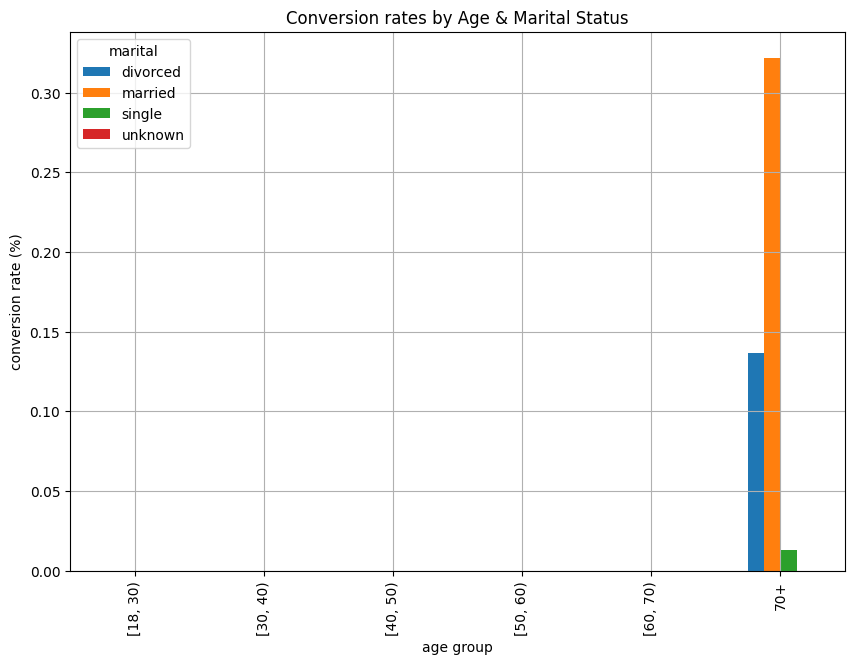

In [39]:
ax = age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

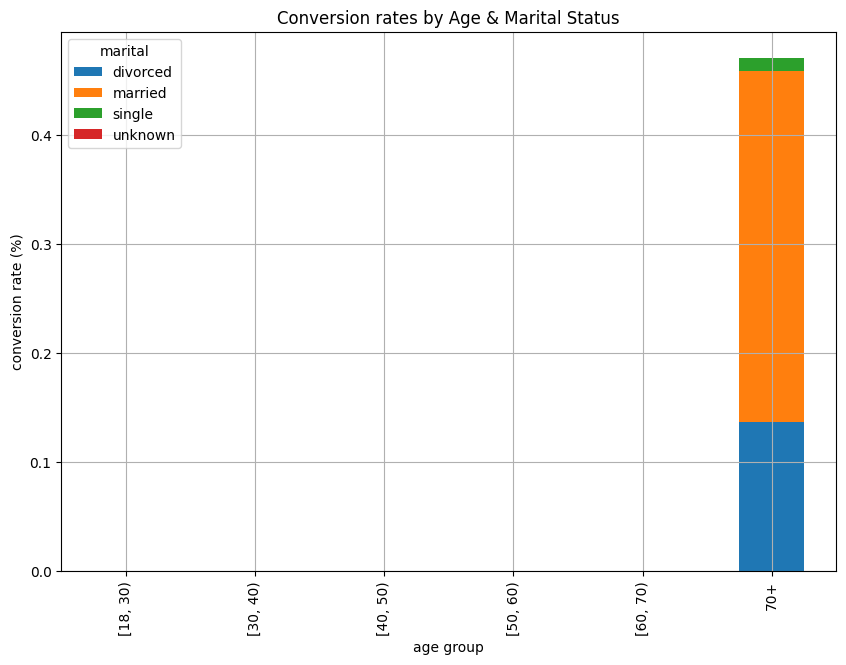

In [40]:
ax = age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()